In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants as c

#Define constants
page = (8.5,5)
gal = 0.01 * 10**(-3)
constant = 0.10055
h_floor = 3.95
m_floor = 10**6
g = 9.804253
r_earth = 6371 * 10**3
m_sun = 2 * 10**30
au = 1.5 * 10**11

In [31]:
#Calculations
sun_pos = c.G * m_sun * (1/(au - r_earth)**2 - 1/(au + r_earth)**2)
print(sun_pos)

g_sun = c.G * m_sun / au**2
print(g_sun)
print(g_sun/g*100)

1.007894846421944e-06
0.005932515555555557
0.06050961307868695


In [29]:
''' Model function for linear regression.
'''
def linear(x, a, b):
    return a*x +b


''' Returns an array of the difference between the g-value and the most recent reference g-value, with the
    corresponding floor levels. 
'''
def delta_g(data, h):
    base = 0
    delta = []
    for i in range(len(data)):
        if data[i,0] == 3: 
            base = i
        else:
            delta.append(((data[i,0] - 3) * h, data[i,1] - data[base,1]))
    return np.array(delta)


''' Returns an estimate of the radius of the Earth as per Equation 1. 
'''
def find_radius(delta_g, floor, reference=3):
    return -2 * (floor - reference) * h_floor * g / delta_g

In [4]:
#Load data
data = np.loadtxt('data.txt', delimiter=' ', skiprows=1)
u = np.array([0.1 for item in data])

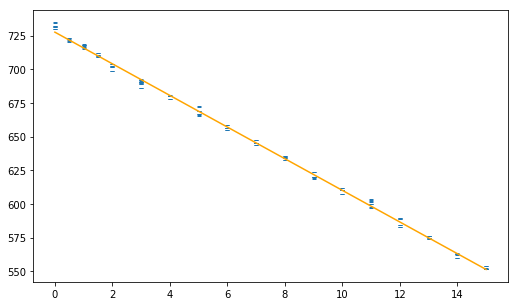

In [5]:
#Plotting the raw data
popt, pcov = curve_fit(linear, data[:,0], data[:,1])

plt.figure(figsize=page)
plt.errorbar(data[:,0], data[:,1], yerr=u, elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='none')
space = np.linspace(0,15,100)
plt.plot(space, linear(space, popt[0], popt[1]), color='orange')
plt.show()

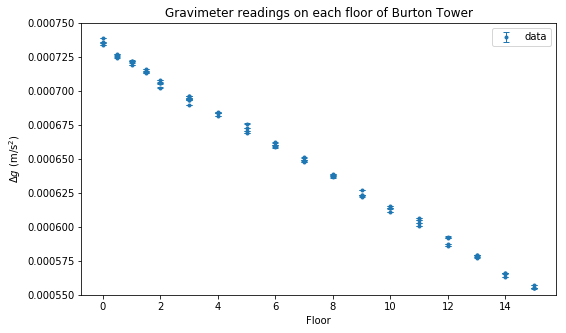

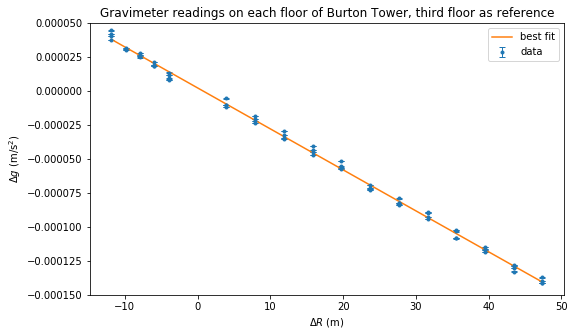

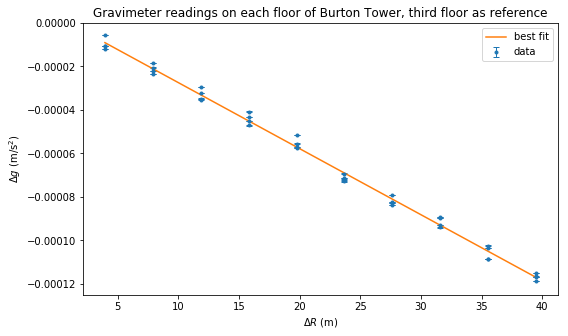

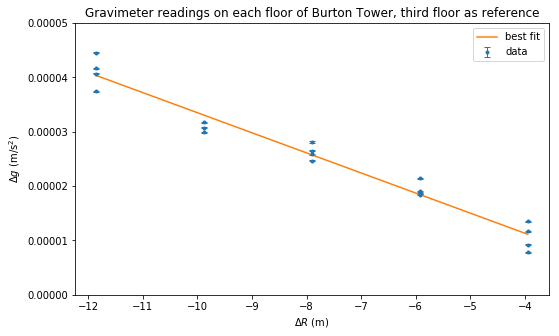

In [34]:
#Converting the data to m/s^2
si_data = np.array([(item[0], item[1] * constant * gal) for item in data])
u_si = u * constant * gal

plt.figure(figsize=page)
plt.errorbar(si_data[:,0], si_data[:,1], yerr=u_si, elinewidth=1.0, capthick=1.0, capsize=3.0, fmt='.', 
             label='data')
plt.ylim(0.00055,0.00075)
plt.xlabel('Floor')
plt.ylabel('$\Delta g$ (m/s$^2$)')
plt.title('Gravimeter readings on each floor of Burton Tower')
plt.legend()
plt.savefig('graphs/raw.png', bbox_inches='tight') 

delta = delta_g(si_data, h_floor)
u_delta = np.array([u_si[0] for item in delta])
space = np.linspace(min(delta[:,0]), max(delta[:,0]), 100)
popt, pcov = curve_fit(linear, delta[:,0], delta[:,1], sigma=u_delta)

plt.figure(figsize=page)
plt.errorbar(delta[:,0], delta[:,1], yerr=u_delta, elinewidth=1.0, capthick=1.0, capsize=3.0, fmt='.', 
             label='data')
plt.plot(space, linear(space, popt[0], popt[1]), label='best fit')
plt.ylim(-0.00015,0.00005)
plt.xlabel('$\Delta R$ (m)')
plt.ylabel('$\Delta g$ (m/s$^2$)')
plt.title('Gravimeter readings on each floor of Burton Tower, third floor as reference')
plt.legend()
plt.savefig('graphs/ref.png', bbox_inches='tight')   

delta_3t13 = np.array([(item[0], item[1]) for item in delta if item[0] > 0 and item[0] < 11*h_floor])
u_3t13 = np.array([u_si[0] for item in delta_3t13])
space = np.linspace(min(delta_3t13[:,0]), max(delta_3t13[:,0]), 100)
popt_3t13, pcov_3t13 = curve_fit(linear, delta_3t13[:,0], delta_3t13[:,1], sigma=u_3t13)

plt.figure(figsize=page)
plt.errorbar(delta_3t13[:,0], delta_3t13[:,1], yerr=u_3t13, elinewidth=1.0, capthick=1.0, capsize=3.0, fmt='.', 
             label='data')
plt.plot(space, linear(space, popt_3t13[0], popt_3t13[1]), label='best fit')
plt.ylim(-0.000125,0.0)
plt.xlabel('$\Delta R$ (m)')
plt.ylabel('$\Delta g$ (m/s$^2$)')
plt.title('Gravimeter readings on each floor of Burton Tower, third floor as reference')
plt.legend()
plt.savefig('graphs/ref3t13.png', bbox_inches='tight')   

delta_0t3 = np.array([(item[0], item[1]) for item in delta if item[0] < 0])
u_0t3 = np.array([u_si[0] for item in delta_0t3])
space = np.linspace(min(delta_0t3[:,0]), max(delta_0t3[:,0]), 100)
popt_0t3, pcov_0t3 = curve_fit(linear, delta_0t3[:,0], delta_0t3[:,1], sigma=u_0t3)

plt.figure(figsize=page)
plt.errorbar(delta_0t3[:,0], delta_0t3[:,1], yerr=u_0t3, elinewidth=1.0, capthick=1.0, capsize=3.0, fmt='.', 
             label='data')
plt.plot(space, linear(space, popt_0t3[0], popt_0t3[1]), label='best fit')
plt.ylim(0.0,0.00005)
plt.xlabel('$\Delta R$ (m)')
plt.ylabel('$\Delta g$ (m/s$^2$)')
plt.title('Gravimeter readings on each floor of Burton Tower, third floor as reference')
plt.legend()
plt.savefig('graphs/ref0t3.png', bbox_inches='tight')   

In [23]:
#Calculating the radius of the Earth based on the optimum fit data
r_est1 = -2 * g / popt[0]
r_est2 = -2 * g / popt_3t13[0]
r_err1 = np.sqrt(pcov[0,0])/np.abs(popt[0]) * r_est1
r_err2 = np.sqrt(pcov_3t13[0,0])/np.abs(popt_3t13[0]) * r_est2

print((r_est1-r_earth)/r_earth)
print(r_est1,r_err1)
print((r_est2-r_earth)/r_earth)
print(r_est2,r_err2)

#Reduced chi squared
N = len(delta)
n = 2
squares = np.sum([((delta[i,1] - linear(delta[i,0], popt[0], popt[1]))/u_delta[i])**2 for i in range(len(delta))])
chi = 1/(N-n) * squares
print(chi)

N = len(delta_3t13)
n = 2
squares = np.sum([((delta_3t13[i,1] - linear(delta_3t13[i,0], popt_3t13[0], popt_3t13[1]))/u_3t13[i])**2 for i in range(len(delta_3t13))])
chi = 1/(N-n) * squares
print(chi)

0.02050552734697106
6501640.714727553 35259.41332785717
0.013452044242519076
6456702.973869089 72933.76392186421
643.6602807249287
599.3038433014224


In [8]:
#Calculating the average radius of the Earth based on the delta data as above
r = np.mean(find_radius(delta[:,1], delta[:,0]))
r_earth = 6371 * 10**3

print((r-r_earth)/r_earth)

#Calculating the average radius of the Earth, only including the delta data 
#from the third to thirteenth floors
delta_cut = []

for item in delta:
    if 3 <= item[0] <= 13: delta_cut.append((item[0], item[1]))
delta_cut = np.array(delta_cut)

r_cut = np.mean(find_radius(delta_cut[:,1], delta_cut[:,0]))

print((r_cut-r_earth)/r_earth)

3.0662463528222896
1.482854416541422


[[1.00000000e+00 4.27757090e-06]
 [2.00000000e+00 1.06939273e-06]
 [3.00000000e+00 4.75285656e-07]
 [4.00000000e+00 2.67348181e-07]
 [5.00000000e+00 1.71102836e-07]
 [6.00000000e+00 1.18821414e-07]
 [7.00000000e+00 8.72973653e-08]
 [8.00000000e+00 6.68370453e-08]
 [9.00000000e+00 5.28095173e-08]
 [1.00000000e+01 4.27757090e-08]
 [1.10000000e+01 3.53518256e-08]
 [1.20000000e+01 2.97053535e-08]
 [1.30000000e+01 2.53110704e-08]
 [1.40000000e+01 2.18243413e-08]
 [1.50000000e+01 1.90114262e-08]
 [1.60000000e+01 1.67092613e-08]
 [1.70000000e+01 1.48012834e-08]
 [1.80000000e+01 1.32023793e-08]
 [1.90000000e+01 1.18492269e-08]]


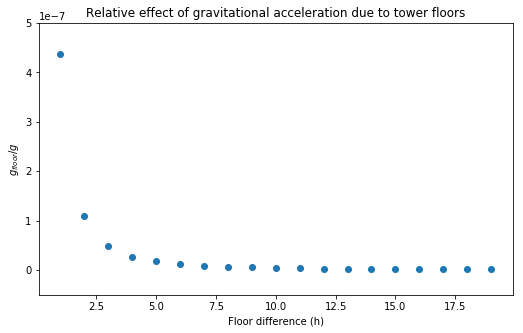

In [9]:
g_floor = np.array([(i, c.G * m_floor / (i * h_floor)**2) for i in np.arange(19)+1])
print(g_floor)

plt.figure(figsize=page)
plt.scatter(g_floor[:,0], g_floor[:,1]/g, s=6**2)
plt.ylim(-5*10**(-8),5*10**(-7))
plt.xlabel('Floor difference (h)')
plt.ylabel('$g_{floor}/g$')
plt.title("Relative effect of gravitational acceleration due to tower floors")
plt.savefig('floorg.png', bbox_inches='tight')